---
jupytext:
  cell_metadata_filter: -all
  formats: md:myst
  text_representation:
    extension: .md
    format_name: myst
    format_version: 0.13
    jupytext_version: 1.11.5
kernelspec:
  display_name: Python 3
  language: python
  name: python3


# Managing data

## Build a regression model using Scikit-learn: prepare and visualize data

:::{figure} https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/ml-regression/data-visualization.png
---
name: 'Data visualization infographic'
width: 90%
---
Infographic by [Dasani Madipalli](https://twitter.com/dasani_decoded)
:::

## Introduction

Now that you are set up with the tools you need to start tackling machine learning model building with Scikit-learn, you are ready to start asking questions of your data. As you work with data and apply ML solutions, it's very important to understand how to ask the right question to properly unlock the potentials of your dataset.

In this section, you will learn:

- How to prepare your data for model-building.
- How to use Matplotlib for data visualization.


:::{seealso}
Click to watch : Preparing and Visualizing data video.
:::

In [2]:
#Install the necessary dependencies
import os
import sys
!{sys.executable} -m pip install --quiet pandas scikit-learn numpy matplotlib jupyterlab_myst ipython python_utils

In [3]:
from IPython.display import HTML
display(HTML("""
<div class="yt-container">
  <iframe src="https://www.youtube.com/embed/11AnOn_OAcE" allowfullscreen></iframe>
</div>
"""))

## Asking the right question of your data

The question you need answered will determine what type of Machine Learning algorithms you will leverage. And the quality of the answer you get back will be heavily dependent on the nature of your data.

Take a look at the [data](https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/data/us-pumpkins.csv) provided for this section. You can open this .csv file in VS Code. A quick skim immediately shows that there are blanks and a mix of strings and numeric data. There's also a strange column called 'Package' where the data is a mix between 'sacks', 'bins' and other values. The data, in fact, is a bit of a mess.

In fact, it is not very common to be gifted a dataset that is completely ready to use to create a Machine Learning model out of the box. In this section, you will learn how to prepare a raw dataset using standard Python libraries. You will also learn various techniques to visualize the data.

## Case study: 'the pumpkin market'

You will find a .csv file in the root `/assets/data/` folder called <a href="https://static-1300131294.cos.ap-shanghai.myqcloud.com/data/us-pumpkins.csv">us-pumpkins.csv</a> which includes 1757 lines of data about the market for pumpkins, sorted into groupings by city. This is raw data extracted from the [Specialty Crops Terminal Markets Standard Reports](https://www.marketnews.usda.gov/mnp/fv-report-config-step1?type=termPrice) distributed by the United States Department of Agriculture.

### Preparing data

This data is in the public domain. It can be downloaded in many separate files, per city, from the USDA website. To avoid too many separate files, we have concatenated all the city data into one spreadsheet, thus we have already _prepared_ the data a bit. Next, let's take a closer look at the data.

### The pumpkin data - early conclusions

What do you notice about this data? You already saw that there is a mix of strings, numbers, blanks and strange values that you need to make sense of.

What question can you ask of this data, using a Regression technique? What about "Predict the price of a pumpkin for sale during a given month". Looking again at the data, there are some changes you need to make to create the data structure necessary for the task.

## Exercise - analyze the pumpkin data

Let's use [Pandas](https://pandas.pydata.org/), (the name stands for `Python Data Analysis`) a tool very useful for shaping data, to analyze and prepare this pumpkin data.

### First, check for missing dates

You will first need to take steps to check for missing dates:

1. Convert the dates to a month format (these are US dates, so the format is `MM/DD/YYYY`).
2. Extract the month to a new column.

Open the [managing-data.ipynb](open-machine-learning-jupyter-book/ml-fundamentals/regression/managing-data.ipynb) file in Visual Studio Code and import the spreadsheet in to a new Pandas dataframe.

1 . Use the `head()` function to view the first five rows.


In [4]:
import pandas as pd

pumpkins = pd.read_csv('https://static-1300131294.cos.ap-shanghai.myqcloud.com/data/us-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


:::{note}
What function would you use to view the last five rows?
:::

2 . Check if there is missing data in the current dataframe:


In [5]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

3 . To make your dataframe easier to work with, drop several of its columns, using `drop()`, keeping only the columns you need:

In [6]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)


### Second, determine average price of pumpkin

Think about how to determine the average price of a pumpkin in a given month. What columns would you pick for this task? Hint: you'll need 3 columns.

Solution: take the average of the `Low Price` and `High Price` columns to populate the new Price column, and convert the Date column to only show the month. Fortunately, according to the check above, there is no missing data for dates or prices.

1 . To calculate the average, add the following code:


In [7]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month


:::{seealso}
Feel free to print any data you'd like to check using `print(month)`.
:::

2 . Now, copy your converted data into a fresh Pandas dataframe:


In [8]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

Printing out your dataframe will show you a clean, tidy dataset on which you can build your new regression model.

### But wait! There's something odd here

If you look at the `Package` column, pumpkins are sold in many different configurations. Some are sold in '1 1/9 bushel' measures, and some in '1/2 bushel' measures, some per pumpkin, some per pound, and some in big boxes with varying widths.

:::{note}
Pumpkins seem very hard to weigh consistently.
:::

Digging into the original data, it's interesting that anything with `Unit of Sale` equalling 'EACH' or 'PER BIN' also have the `Package` type per inch, per bin, or 'each'. Pumpkins seem to be very hard to weigh consistently, so let's filter them by selecting only pumpkins with the string 'bushel' in their `Package` column.

1. Add a filter at the top of the file, under the initial .csv import:

In [9]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

If you print the data now, you can see that you are only getting the 415 or so rows of data containing pumpkins by the bushel.

### But wait! There's one more thing to do

Did you notice that the bushel amount varies per row? You need to normalize the pricing so that you show the pricing per bushel, so do some math to standardize it.

1. Add these lines after the block creating the new_pumpkins dataframe:

In [10]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

:::{seealso}
According to [The Spruce Eats](https://www.thespruceeats.com/how-much-is-a-bushel-1389308), a bushel's weight depends on the type of produce, as it's a volume measurement. "A bushel of tomatoes, for example, is supposed to weigh 56 pounds... Leaves and greens take up more space with less weight, so a bushel of spinach is only 20 pounds." It's all pretty complicated! Let's not bother with making a bushel-to-pound conversion, and instead price by the bushel. All this study of bushels of pumpkins, however, goes to show how very important it is to understand the nature of your data!
:::

Now, you can analyze the pricing per unit based on their bushel measurement. If you print out the data one more time, you can see how it's standardized.

:::{seealso}
Did you notice that pumpkins sold by the half-bushel are very expensive? Can you figure out why? Hint: little pumpkins are way pricier than big ones, probably because there are so many more of them per bushel, given the unused space taken by one big hollow pie pumpkin.
:::

## Visualization strategies

Part of the data scientist's role is to demonstrate the quality and nature of the data they are working with. To do this, they often create interesting visualizations, or plots, graphs, and charts, showing different aspects of data. In this way, they are able to visually show relationships and gaps that are otherwise hard to uncover.

Visualizations can also help determine the machine learning technique most appropriate for the data. A scatterplot that seems to follow a line, for example, indicates that the data is a good candidate for a linear regression exercise.

One data visualization library that works well in Jupyter notebooks is [Matplotlib](https://matplotlib.org/) (which you also saw in the previous lesson).

:::{seealso}
Get more experience with data visualization in [these tutorials](https://docs.microsoft.com/learn/modules/explore-analyze-data-with-python?WT.mc_id=academic-77952-leestott).
:::

## Exercise - experiment with Matplotlib

Try to create some basic plots to display the new dataframe you just created. What would a basic line plot show?

1 . Import Matplotlib at the top of the file, under the Pandas import:

In [11]:
import matplotlib.pyplot as plt

2 . Rerun the entire notebook to refresh.

3 . At the bottom of the notebook, add a cell to plot the data as a box:

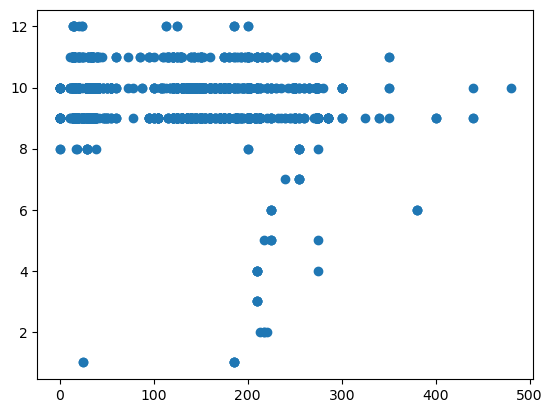

In [12]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

:::{note}
A scatterplot showing price to month relationship.
:::

Is this a useful plot? Does anything about it surprise you?

It's not particularly useful as all it does is display in your data as a spread of points in a given month.

### Make it useful

To get charts to display useful data, you usually need to group the data somehow. Let's try creating a plot where the y axis shows the months and the data demonstrates the distribution of data.

1. Add a cell to create a grouped bar chart:

Text(0, 0.5, 'Pumpkin Price')

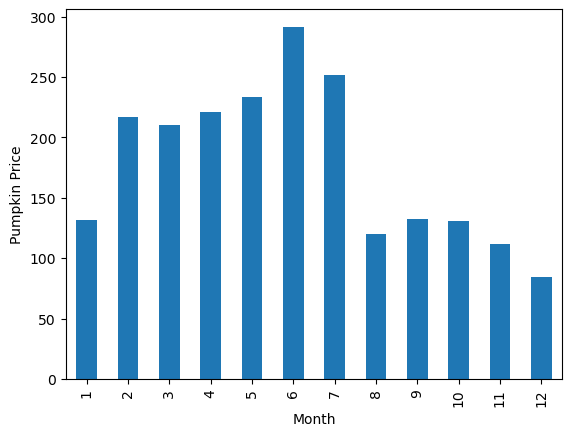

In [13]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

:::{note}
A bar chart showing price to month relationship.
:::

This is a more useful data visualization! It seems to indicate that the highest price for pumpkins occurs in September and October. Does that meet your expectation? Why or why not?

## Self study

Take a look at the many ways to visualize data. Make a list of the various libraries available and note which are best for given types of tasks, for example 2D visualizations vs. 3D visualizations. What do you discover?

## Your turn! 🚀

Explore the different types of visualization that Matplotlib offers. Which types are most appropriate for regression problems?

Assignment - [Exploring visualization](open-machine-learning-jupyter-book/assignments/ml-fundamentals/exploring-visualizations.md)

## Acknowledgments

Thanks to Microsoft for creating the open-source course [ML-For-Beginners](https://github.com/microsoft/ML-For-Beginners). It inspires the majority of the content in this chapter.
